<a href="https://colab.research.google.com/github/akash-yede/Twittorials/blob/master/CTR_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting position CTR curves

CTR curves can be useful for SEO traffic forecasting based on position changes

For example, https://www.advancedwebranking.com/ctrstudy/

In [ ]:
%%capture
!pip install git+https://github.com/joshcarty/google-searchconsole


First, there is some setup to download a client_id.json file our Python code can use to connect securely to Google Search Console.

Activate Search Console API in Compute Engine
https://console.cloud.google.com/apis/api/webmasters.googleapis.com/overview?project=&folder=&organizationId=
Create New Credentials / Help me choose (Search Console API, Other UI, User data)
https://console.cloud.google.com/apis/credentials/wizard?api=iamcredentials.googleapis.com&project=
Download client_id.json

In [ ]:
#upload client_id.json
from google.colab import files

files.upload()

In [ ]:
import searchconsole

account = searchconsole.authenticate(client_config="client_id.json", serialize='credentials.json', flow="console")


In [ ]:
webproperty = account['https://www.domain.com/'] 

In [ ]:
#let's build a pandas dataframe with the search console data
import pandas as pd

def get_search_console_data(webproperty, days=-90):
  if webproperty is not None:
    query = webproperty.query.range(start='today', days=days).dimension('page')

    r = query.get()

    df = pd.DataFrame(r.rows)

    return df

  print("Web property doesn't exist, please select a valid one from this list")
  print(account.webproperties)

  return None


In [ ]:
df = get_search_console_data(webproperty)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52979 entries, 0 to 52978
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   page         52979 non-null  object 
 1   clicks       52979 non-null  int64  
 2   impressions  52979 non-null  int64  
 3   ctr          52979 non-null  float64
 4   position     52979 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ MB


In [ ]:
#Preserve privacy
#df["page"] = "XXX"

In [ ]:
df.head()

,page,clicks,impressions,ctr,position
0,XXX,29909,228535,0.130873,16.978800
1,XXX,14926,132973,0.112248,6.164424
2,XXX,4837,142811,0.033870,38.857679
3,XXX,4399,185644,0.023696,16.927194
4,XXX,3551,25107,0.141435,11.423786


Position grouping

https://stackoverflow.com/questions/34683963/pandas-group-by-rounded-floating-number

In [ ]:
df.groupby(df['position'].apply(lambda x: int(round(x, 0)))).mean()["ctr"]


position
1      0.903335
2      0.778616
3      0.706077
4      0.620655
5      0.546682
         ...   
106    0.750000
131    1.000000
149    0.142857
160    1.000000
214    0.000000
Name: ctr, Length: 103, dtype: float64

1. Filter to see only position 1 - 20
2. Round position numbers to integers
3. Calculate the CTR mean

In [ ]:
df.query("position < 20").groupby(df['position'].apply(lambda x: int(round(x, 0)))).mean()["ctr"]


position
1     0.903335
2     0.778616
3     0.706077
4     0.620655
5     0.546682
6     0.493563
7     0.393256
8     0.337710
9     0.263124
10    0.260993
11    0.211491
12    0.206297
13    0.192463
14    0.227653
15    0.232472
16    0.274906
17    0.283696
18    0.275552
19    0.272716
20    0.202685
Name: ctr, dtype: float64

Ploting with Pandas

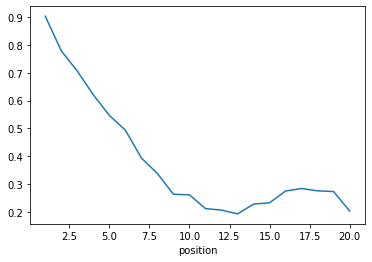

In [ ]:
df.query("position < 20").groupby(df['position'].apply(lambda x: int(round(x, 0)))).mean()["ctr"].plot()


In [ ]:
ctr_curve = df.query("position < 20").groupby(df['position'].apply(lambda x: int(round(x, 0)))).mean()["ctr"]

Ploting with Plotly

In [ ]:
new_df=pd.DataFrame(ctr_curve)

In [ ]:
new_df

,ctr
position,
1,0.903335
2,0.778616
3,0.706077
4,0.620655
5,0.546682
6,0.493563
7,0.393256
8,0.337710
9,0.263124


In [ ]:
import plotly.express as px

fig = px.line(ctr_curve, x=new_df.index, y="ctr", title='CTR by Position')
fig.show()